In [14]:
#!/usr/bin/python3
import sys
import cv2
import boto3 #Import Boto For AWS
import tinys3 #Import tinys3 For uploading Images to S3 Bucket
from boto3 import client

Create an IAM Role for S3. 

In [15]:
#AWS IAM Access Keys --> This Role only allows uploads to S3
AWS_ACCESS_KEY_ID = ''
AWS_SECRET_ACCESS_KEY = ''

Display Image before uploading to Amazon S3

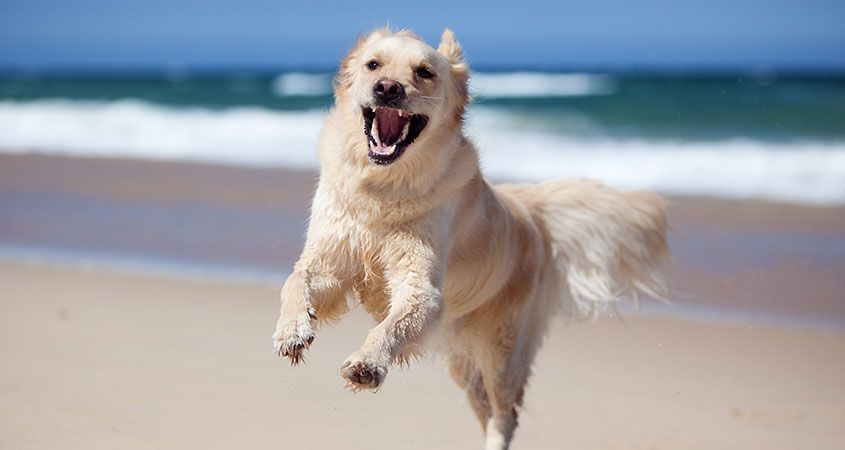

In [16]:
from IPython.display import Image
Image(filename="dog.jpg",width=300, height=300)

Using the 'Tiny' module this is the simpliest way to upload to an S3 Bucket.

In [17]:
# Creating a simple connection
conn = tinys3.Connection(AWS_ACCESS_KEY_ID,AWS_SECRET_ACCESS_KEY)

# Uploading a single file
f = open('dog.jpg','rb')
conn.upload('dog.jpg',f,'<BUCKET>')

<Response [200]>

Call the Rekognition API from Boto3 so we can classify the image

In [18]:
client=boto3.client('rekognition')

In [19]:
response = client.detect_labels(Image={'S3Object':{'Bucket':'<>','Name':'dog.jpg'}},
                                MinConfidence=75)

Print out the Labels that our Image has been classified with.

In [20]:
for label in response['Labels']:
        print (label['Name'] + ' : ' + str(label['Confidence']))


Animal : 91.81600952148438
Canine : 91.81600952148438
Dog : 91.81600952148438
Golden Retriever : 91.81600952148438
Mammal : 91.81600952148438
Pet : 91.81600952148438
Terrier : 79.28507995605469
